### Google Colab and GitHub Link
- If you are running this in an IDE and wish to run this on colab here is a link:
- https://colab.research.google.com/drive/1rSocNmLAb1LvU5Dhycl4-wb4OvG_wx-s?usp=sharing
- GitHub link:
- https://github.com/brencemoore/AutoClaimAI

## Import Data
- Import the result .csv file of each model performance metric.

In [6]:
!pip install gdown

import gdown
import pandas as pd

# Download metrics of each classification model's evaluation table
gdown.download(id='1A3dG0ZX51wCy_WjtiW6tcNPzLVyA7Ph2', output='car_make_model.csv', quiet=False)
gdown.download(id='1gYZ1Uw_aQ-5pttR_3hcYNsBOTUCM4-k0', output='car_damage.csv', quiet=False)
gdown.download(id='1z393BGTtBhsBWAyL4p7WjpUMZSU_7KXB', output='car_part.csv', quiet=False)
gdown.download(id='1JuBQ5vNKIdOCSXrZkTSgvTEyGwK_sloD', output='car_severity.csv', quiet=False)


In [31]:
# Read each csv file and create a dataframe for each
car_make_model = pd.read_csv('car_make_model.csv')
car_damage_type = pd.read_csv('car_damage.csv')
car_part = pd.read_csv('car_part.csv')
car_severity = pd.read_csv('car_severity.csv')


In [16]:
print(car_make_model.tail(10))
print(car_damage_type.tail(10))
print(car_part.tail(10))
print(car_severity.tail(10))

                Unnamed: 0  precision  recall  f1-score  support
306               LEXUS RC      0.429   0.429     0.429      7.0
307            GENESIS G70      0.667   1.000     0.800      2.0
308  HYUNDAI KONA ELECTRIC      1.000   1.000     1.000      1.0
309       MASERATI LEVANTE      0.500   1.000     0.667      2.0
310           CADILLAC XT4      1.000   1.000     1.000      2.0
311           CADILLAC CT4      1.000   1.000     1.000      1.0
312            MAZDA CX-30      1.000   1.000     1.000      1.0
313              micro avg      0.796   0.796     0.796   5000.0
314              macro avg      0.815   0.856     0.822   5000.0
315           weighted avg      0.809   0.796     0.792   5000.0
      Unnamed: 0  precision  recall  f1-score   support
0          CRACK      1.000   1.000     1.000    34.000
1           DENT      0.988   0.976     0.982   416.000
2  GLASS SHATTER      1.000   1.000     1.000   237.000
3    LAMP BROKEN      0.957   1.000     0.978   176.000
4    

In [39]:
# Filter make and model dataframe
make_model_filtered = car_make_model.loc[314:315].reset_index().drop(['support', 'index'], axis=1)
make_model_filtered['model'] = 'make and model'

make_model_filtered

,Unnamed: 0,precision,recall,f1-score,model
0,macro avg,0.815,0.856,0.822,make and model
1,weighted avg,0.809,0.796,0.792,make and model


In [40]:
# Filter car damage type dataframe
damage_type_filtered = car_damage_type.loc[7:8].reset_index().drop(['support', 'index'], axis=1)
damage_type_filtered['model'] = 'damage type'

damage_type_filtered

,Unnamed: 0,precision,recall,f1-score,model
0,macro avg,0.990,0.994,0.992,damage type
1,weighted avg,0.989,0.989,0.989,damage type


In [41]:
# Filter car damage part dataframe
part_filtered = car_part.loc[9:10].reset_index().drop(['support', 'index'], axis=1)
part_filtered['model'] = 'car part'

part_filtered

,Unnamed: 0,precision,recall,f1-score,model
0,macro avg,0.818,0.871,0.833,car part
1,weighted avg,0.882,0.868,0.870,car part


In [42]:
# Filter damage severity classification
severity_filtered = car_severity[4:6].reset_index().drop(['support', 'index'], axis=1)
severity_filtered['model'] = 'severity'

severity_filtered

,Unnamed: 0,precision,recall,f1-score,model
0,macro avg,0.751,0.740,0.743,severity
1,weighted avg,0.763,0.764,0.762,severity


In [54]:
# Combine the filtered dataframes into 1 table
combined_df = pd.concat([make_model_filtered, damage_type_filtered, part_filtered, severity_filtered], ignore_index=True)
combined_df = combined_df.rename(columns={'Unnamed: 0':'average type'})
combined_df = combined_df[['model', 'average type', 'precision', 'recall', 'f1-score']]
print(combined_df)
combined_df

            model  average type  precision  recall  f1-score
0  make and model     macro avg      0.815   0.856     0.822
1  make and model  weighted avg      0.809   0.796     0.792
2     damage type     macro avg      0.990   0.994     0.992
3     damage type  weighted avg      0.989   0.989     0.989
4        car part     macro avg      0.818   0.871     0.833
5        car part  weighted avg      0.882   0.868     0.870
6        severity     macro avg      0.751   0.740     0.743
7        severity  weighted avg      0.763   0.764     0.762


,model,average type,precision,recall,f1-score
0,make and model,macro avg,0.815,0.856,0.822
1,make and model,weighted avg,0.809,0.796,0.792
2,damage type,macro avg,0.990,0.994,0.992
3,damage type,weighted avg,0.989,0.989,0.989
4,car part,macro avg,0.818,0.871,0.833
5,car part,weighted avg,0.882,0.868,0.870
6,severity,macro avg,0.751,0.740,0.743
7,severity,weighted avg,0.763,0.764,0.762


## Create a Bar Chart

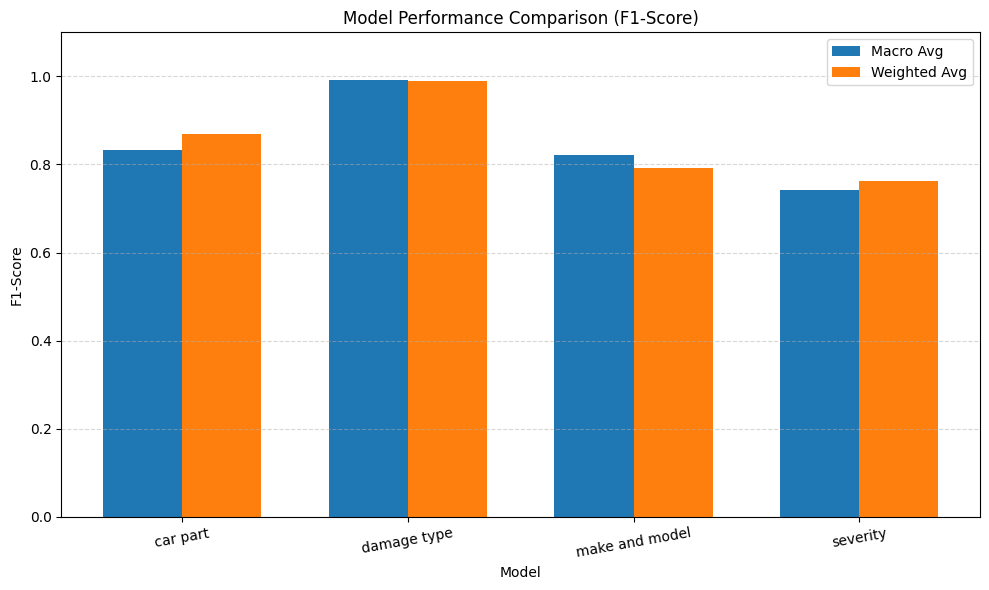

In [53]:
import matplotlib.pyplot as plt
import numpy as np

# Pivot the table so each model has columns for macro and weighted avg
pivot = combined_df.pivot(index="model", columns="average type", values="f1-score")

# Setup figure
plt.figure(figsize=(10, 6))

x = np.arange(len(pivot.index))
bar_width = 0.35

# Plot bars
plt.bar(x - bar_width/2, pivot["macro avg"], width=bar_width, label="Macro Avg")
plt.bar(x + bar_width/2, pivot["weighted avg"], width=bar_width, label="Weighted Avg")

# Labels
plt.title("Model Performance Comparison (F1-Score)")
plt.xlabel("Model")
plt.ylabel("F1-Score")
plt.xticks(x, pivot.index, rotation=10)
plt.ylim(0, 1.1)

plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.5)

plt.tight_layout()
plt.show()
